BÀI LÀM MẪU: PHÂN TÍCH DỮ LIỆU ĐƠN BIẾN

Bài toán 1: Nhiệm vụ 1 - Dữ liệu chim cánh cụt Palmer

Mục tiêu: Sử dụng các thư viện Python (Pandas, Matplotlib, Seaborn) để thực hiện phân tích dữ liệu đơn biến, nhằm hiểu rõ đặc điểm và sự phân bố của từng thuộc tính trong tập dữ liệu.

Bước 1: Chuẩn bị môi trường và Tải dữ liệu
Đầu tiên, chúng ta cần import các thư viện cần thiết và tải tập dữ liệu. Bạn có thể tải file penguins_size.csv từ link Kaggle về máy.

Python



In [30]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style cho biểu đồ
sns.set(style="whitegrid")

# Tải dữ liệu từ file csv đã tải về
# Thay "path/to/your/penguins_size.csv" bằng đường dẫn thực tế đến file của bạn
try:
    df = pd.read_csv("penguins_size.csv")
except FileNotFoundError:
    print("Không tìm thấy file. Hãy chắc chắn rằng file 'penguins_size.csv' nằm trong cùng thư mục hoặc cung cấp đúng đường dẫn.")
    # Để tiếp tục chạy ví dụ, có thể tải dữ liệu mẫu từ seaborn
    # df = sns.load_dataset("penguins")

# Hiển thị 5 dòng đầu tiên của dữ liệu
print("5 dòng dữ liệu đầu tiên:")
print(df.head())

# Hiển thị thông tin tổng quan về dữ liệu
print("\nThông tin tổng quan (info):")
df.info()

# Hiển thị thống kê mô tả cho các cột số
print("\nThống kê mô tả (describe):")
print(df.describe())

5 dòng dữ liệu đầu tiên:
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

Thông tin tổng quan (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non

Phân tích kết quả ban đầu:

df.head(): Cho thấy các cột dữ liệu bao gồm: species, island, culmen_length_mm (độ dài mỏ), culmen_depth_mm (độ sâu mỏ), flipper_length_mm (độ dài vây), body_mass_g (khối lượng cơ thể), và sex (giới tính).

df.info(): Cho thấy có 344 mẫu. Một vài cột như culmen_length_mm, sex,... có số lượng giá trị non-null ít hơn 344, nghĩa là có giá trị bị thiếu (missing values).

df.describe(): Cung cấp các thống kê cơ bản (trung bình, độ lệch chuẩn, min, max, các tứ phân vị) cho các cột dữ liệu số.

Bước 2: Tiền xử lý dữ liệu (Xử lý giá trị thiếu)
Phân tích đơn biến sẽ chính xác hơn trên một tập dữ liệu đầy đủ. Có nhiều cách xử lý giá trị thiếu, nhưng trong bài toán làm quen này, chúng ta sẽ chọn cách đơn giản nhất là xóa các hàng chứa giá trị thiếu.

In [31]:
# Kiểm tra số lượng giá trị thiếu trên mỗi cột
print("\nSố lượng giá trị thiếu trước khi xử lý:")
print(df.isnull().sum())

# Xóa các hàng có chứa ít nhất một giá trị thiếu
df_cleaned = df.dropna()

# Kiểm tra lại thông tin sau khi xóa
print("\nThông tin tổng quan sau khi xử lý giá trị thiếu:")
df_cleaned.info()


Số lượng giá trị thiếu trước khi xử lý:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Thông tin tổng quan sau khi xử lý giá trị thiếu:
<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


Kết quả: Sau khi xóa, chúng ta còn lại 334 mẫu đầy đủ dữ liệu để phân tích.

Bước 3: Phân tích dữ liệu đơn biến (Univariate Analysis)
Chúng ta sẽ phân tích riêng lẻ từng loại biến: biến định tính (categorical) và biến định lượng (numerical).

3.1. Phân tích các biến định tính (Categorical Variables)
Các biến định tính trong tập dữ liệu này là: species, island, sex. Đối với loại biến này, chúng ta thường quan tâm đến tần suất (frequency) và tỷ lệ (proportion) của mỗi giá trị.

a) Phân tích biến species (Loài)


Số lượng của mỗi loài chim cánh cụt:
species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64


C:\Users\Laptop K1\AppData\Local\Temp\ipykernel_1668\3908184819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='species', palette='viridis')


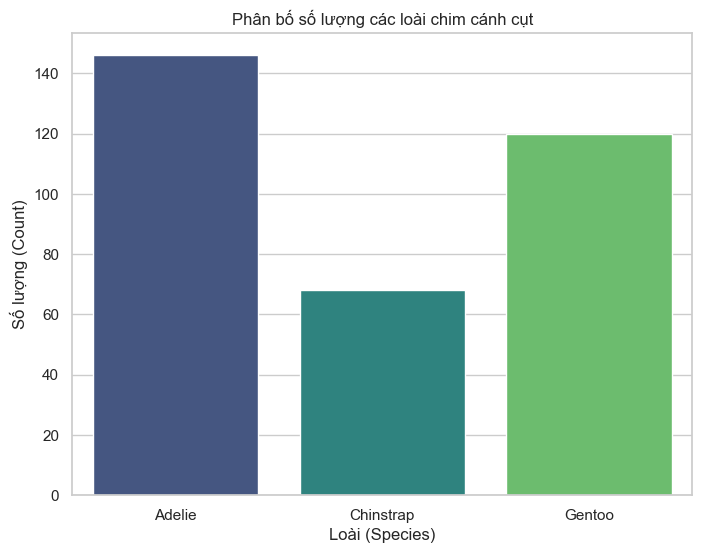

In [35]:
# Đếm số lượng mỗi loài
species_counts = df_cleaned['species'].value_counts()
print("\nSố lượng của mỗi loài chim cánh cụt:")
print(species_counts)

# Trực quan hóa bằng biểu đồ cột (Bar Chart)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='species', palette='viridis')
plt.title('Phân bố số lượng các loài chim cánh cụt')
plt.xlabel('Loài (Species)')
plt.ylabel('Số lượng (Count)')
plt.show()

Nhận xét:

Loài Adelie có số lượng nhiều nhất trong tập dữ liệu (146 cá thể).

Loài Chinstrap có số lượng ít nhất (68 cá thể).

b) Phân tích biến island (Đảo)


Số lượng chim cánh cụt trên mỗi đảo:
island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64


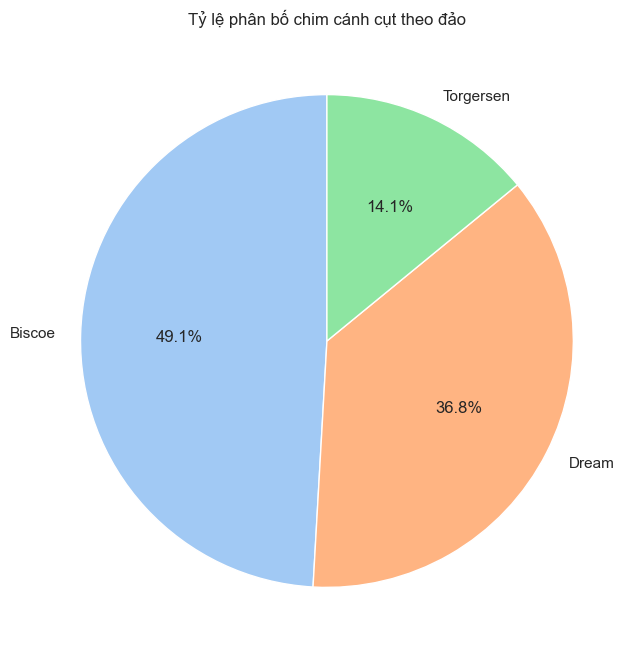

In [25]:
# Đếm số lượng chim cánh cụt trên mỗi đảo
island_counts = df_cleaned['island'].value_counts()
print("\nSố lượng chim cánh cụt trên mỗi đảo:")
print(island_counts)

# Trực quan hóa bằng biểu đồ tròn (Pie Chart) để thấy tỷ lệ
plt.figure(figsize=(8, 8))
plt.pie(island_counts, labels=island_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Tỷ lệ phân bố chim cánh cụt theo đảo')
plt.show()

Nhận xét:

Đảo Biscoe là nơi sinh sống của nhiều chim cánh cụt nhất (gần 50%).

Đảo Torgersen có ít chim cánh cụt nhất.

c) Phân tích biến sex (Giới tính)


Số lượng chim cánh cụt theo giới tính:
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


C:\Users\Laptop K1\AppData\Local\Temp\ipykernel_1668\3392653952.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='sex', palette='coolwarm')


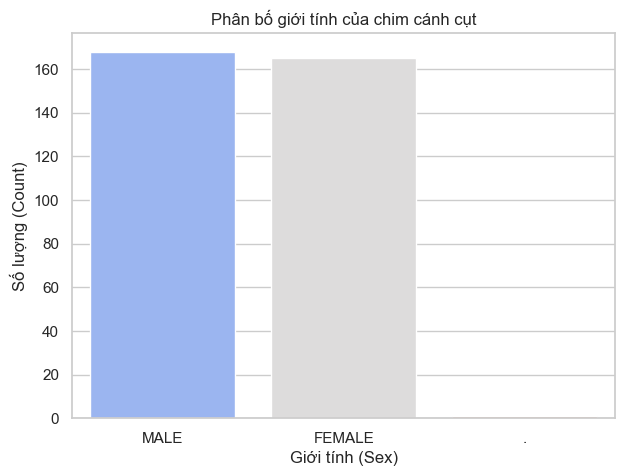

In [26]:
# Đếm số lượng theo giới tính
sex_counts = df_cleaned['sex'].value_counts()
print("\nSố lượng chim cánh cụt theo giới tính:")
print(sex_counts)

# Trực quan hóa bằng biểu đồ cột
plt.figure(figsize=(7, 5))
sns.countplot(data=df_cleaned, x='sex', palette='coolwarm')
plt.title('Phân bố giới tính của chim cánh cụt')
plt.xlabel('Giới tính (Sex)')
plt.ylabel('Số lượng (Count)')
plt.show()

Nhận xét:

Số lượng chim cánh cụt đực (MALE) và cái (FEMALE) trong tập dữ liệu gần như bằng nhau.

3.2. Phân tích các biến định lượng (Numerical Variables)
Các biến định lượng là: culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g. Đối với loại biến này, chúng ta quan tâm đến:

Xu hướng trung tâm: Trung bình (mean), trung vị (median).

Độ phân tán: Độ lệch chuẩn (std), khoảng giá trị (min-max), khoảng tứ phân vị (IQR).

Hình dạng phân phối: Sử dụng biểu đồ Histogram hoặc Box Plot.

a) Phân tích biến culmen_length_mm (Độ dài mỏ)

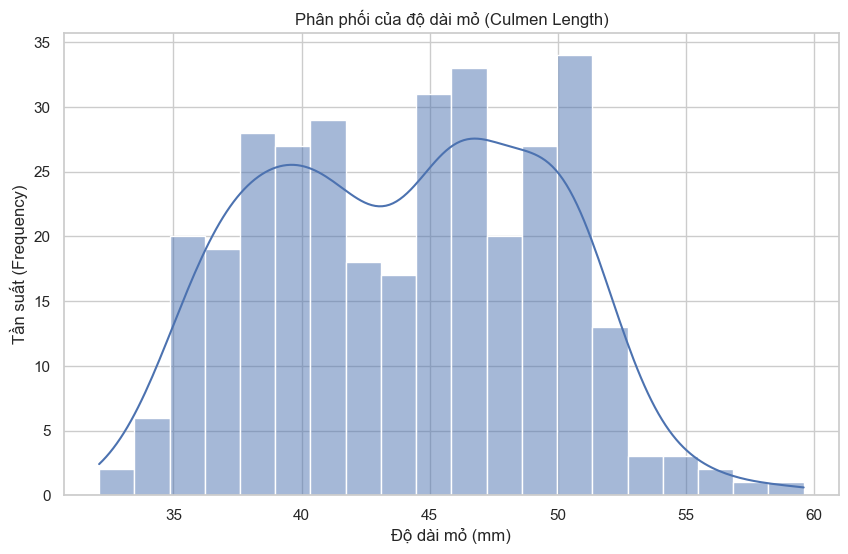

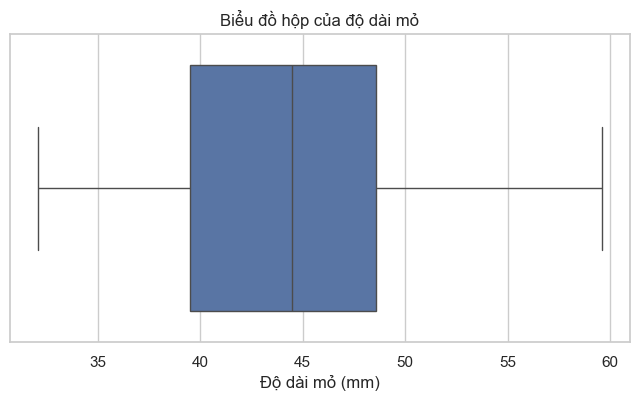

In [27]:
# Trực quan hóa phân phối bằng Histogram và biểu đồ mật độ (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='culmen_length_mm', kde=True, bins=20)
plt.title('Phân phối của độ dài mỏ (Culmen Length)')
plt.xlabel('Độ dài mỏ (mm)')
plt.ylabel('Tần suất (Frequency)')
plt.show()

# Trực quan hóa bằng biểu đồ hộp (Box Plot) để xem các giá trị ngoại lai
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_cleaned, x='culmen_length_mm')
plt.title('Biểu đồ hộp của độ dài mỏ')
plt.xlabel('Độ dài mỏ (mm)')
plt.show()

Nhận xét:

Dựa vào df.describe(), độ dài mỏ trung bình là khoảng 43.99 mm.

Biểu đồ histogram cho thấy phân phối có vẻ như là đa phương thức (multimodal), với ít nhất hai đỉnh chính. Điều này gợi ý rằng có thể có các nhóm con khác nhau trong dữ liệu (ví dụ: các loài khác nhau có độ dài mỏ khác nhau).

Biểu đồ hộp không cho thấy điểm ngoại lai rõ rệt.

b) Phân tích biến body_mass_g (Khối lượng cơ thể)

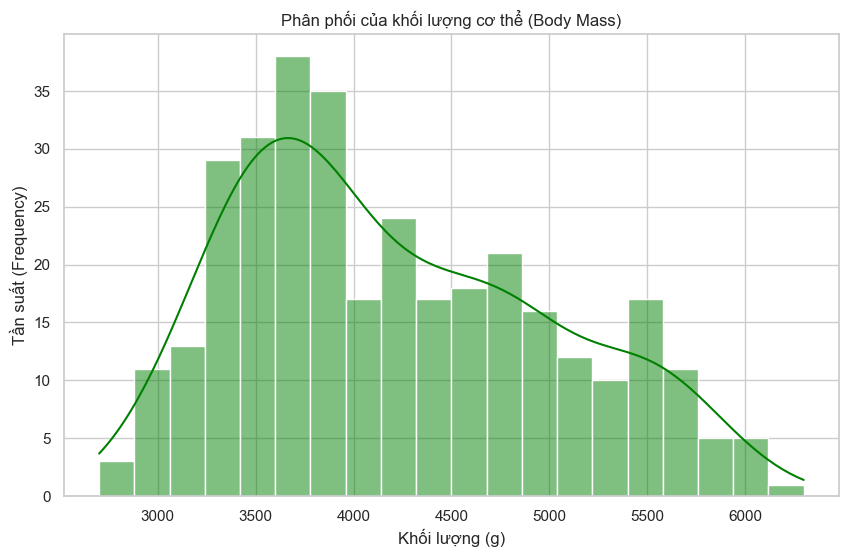

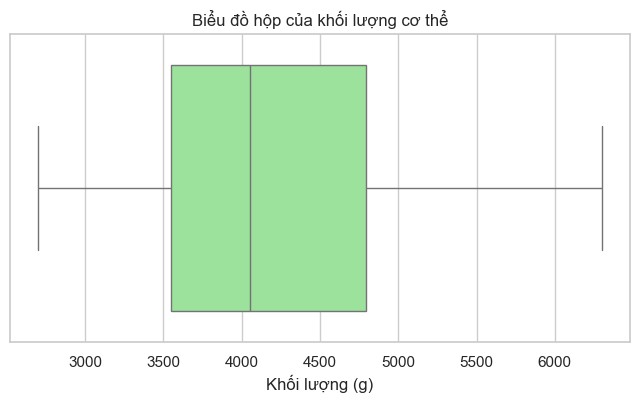

In [28]:
# Trực quan hóa phân phối bằng Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='body_mass_g', kde=True, color='green', bins=20)
plt.title('Phân phối của khối lượng cơ thể (Body Mass)')
plt.xlabel('Khối lượng (g)')
plt.ylabel('Tần suất (Frequency)')
plt.show()

# Trực quan hóa bằng biểu đồ hộp (Box Plot)
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_cleaned, x='body_mass_g', color='lightgreen')
plt.title('Biểu đồ hộp của khối lượng cơ thể')
plt.xlabel('Khối lượng (g)')
plt.show()

Nhận xét:

Khối lượng cơ thể trung bình là khoảng 4207g (4.2 kg).

Tương tự như độ dài mỏ, phân phối khối lượng cơ thể cũng có vẻ có nhiều đỉnh, cho thấy sự tồn tại của các nhóm con.

Biểu đồ hộp cho thấy dữ liệu phân bố khá rộng và không có điểm ngoại lai nào.

Bạn có thể thực hiện các phân tích tương tự cho culmen_depth_mm và flipper_length_mm theo cách trên.